# Lab 1: Semantic Similarity
## Imports

In [27]:
import pandas as pd
from gensim.models import KeyedVectors
from nltk.corpus import wordnet as wn, wordnet_ic as wn_ic, lin_thesaurus as lin
from wnsim import noun_path_similarity, noun_similarity, plot_scatter_with_regression

## Useful WN Functions

In [3]:
wn.synsets("book")

[Synset('book.n.01'),
 Synset('book.n.02'),
 Synset('record.n.05'),
 Synset('script.n.01'),
 Synset('ledger.n.01'),
 Synset('book.n.06'),
 Synset('book.n.07'),
 Synset('koran.n.01'),
 Synset('bible.n.01'),
 Synset('book.n.10'),
 Synset('book.n.11'),
 Synset('book.v.01'),
 Synset('reserve.v.04'),
 Synset('book.v.03'),
 Synset('book.v.04')]

In [4]:
wn.synsets("book", wn.NOUN)

[Synset('book.n.01'),
 Synset('book.n.02'),
 Synset('record.n.05'),
 Synset('script.n.01'),
 Synset('ledger.n.01'),
 Synset('book.n.06'),
 Synset('book.n.07'),
 Synset('koran.n.01'),
 Synset('bible.n.01'),
 Synset('book.n.10'),
 Synset('book.n.11')]

In [5]:
synsetA = wn.synsets("book", wn.NOUN)[0]
synsetA.definition()

'a written work or composition that has been published (printed on pages bound together)'

In [6]:
synsetA.hyponyms()

[Synset('appointment_book.n.01'),
 Synset('authority.n.07'),
 Synset('bestiary.n.01'),
 Synset('booklet.n.01'),
 Synset('catalog.n.01'),
 Synset('catechism.n.02'),
 Synset('copybook.n.01'),
 Synset('curiosa.n.01'),
 Synset('formulary.n.01'),
 Synset('phrase_book.n.01'),
 Synset('playbook.n.02'),
 Synset('pop-up_book.n.01'),
 Synset('prayer_book.n.01'),
 Synset('reference_book.n.01'),
 Synset('review_copy.n.01'),
 Synset('songbook.n.01'),
 Synset('storybook.n.01'),
 Synset('textbook.n.01'),
 Synset('tome.n.01'),
 Synset('trade_book.n.01'),
 Synset('workbook.n.01'),
 Synset('yearbook.n.01')]

In [7]:
synsetA.hypernyms()

[Synset('publication.n.01')]

In [8]:
synsetB = wn.synsets("book", wn.NOUN)[1]
synsetA.path_similarity(synsetB)

0.2

In [9]:
brown_ic = wn_ic.ic("ic-brown.dat")
synsetA.res_similarity(synsetB, brown_ic)

5.454686565783099

In [10]:
synsetA.lin_similarity(synsetB, brown_ic)

0.7098990245459575

## Nouns Similarity


In [11]:
noun_path_similarity('chicken', 'car')


0.0909

In [12]:
noun_similarity('chicken', 'car')

0.0909

In [13]:
noun_similarity('chicken', 'car', 'res_similarity')

1.5318

In [14]:
noun_similarity('chicken', 'car', 'lin_similarity')

0.179

## Human Synonymy Judgements

In [15]:
df = pd.read_csv('mcdata.csv', header=None, names=['word_1', 'word_2', 'mc_sim'])

df['path_sim'] = [noun_similarity(word_1, word_2) for word_1, word_2 in zip(df['word_1'], df['word_2'])]
df['res_sim'] = [noun_similarity(word_1, word_2, 'res_similarity') for word_1, word_2 in
                 zip(df['word_1'], df['word_2'])]
df['lin_sim'] = [noun_similarity(word_1, word_2, 'lin_similarity') for word_1, word_2 in
                 zip(df['word_1'], df['word_2'])]
df

,word_1,word_2,mc_sim,path_sim,res_sim,lin_sim
0,asylum,madhouse,3.61,0.5000,9.4752,0.8556
1,bird,cock,3.05,0.5000,7.6778,0.7739
2,bird,crane,2.97,0.2500,7.6778,0.7478
3,boy,lad,3.76,0.5000,8.3995,0.8306
4,brother,monk,2.82,0.5000,9.2616,0.9864
5,car,automobile,3.92,1.0000,7.5914,1.0000
6,cemetery,woodland,0.95,0.1111,1.2900,0.1234
7,chord,smile,0.13,0.0909,2.6196,0.2463
8,coast,forest,0.42,0.1667,1.2900,0.1306
9,coast,hill,0.87,0.2000,5.8847,0.5991


In [16]:
df.corr(method='spearman')

,mc_sim,path_sim,res_sim,lin_sim
mc_sim,1.000000,0.722743,0.735945,0.753510
path_sim,0.722743,1.000000,0.900648,0.945509
res_sim,0.735945,0.900648,1.000000,0.962707
lin_sim,0.753510,0.945509,0.962707,1.000000


lin_sim and res_sim are highly correlated.

Correlations between the all of wordnet measurements and human (mc) are only about 0.7

## Distributional Similarity

In [17]:
filename = '../GoogleNews-vectors-negative300.bin'
my_model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [18]:
my_model.similarity('man', 'woman')

0.76640123

In [19]:
# Do not run this cell, takes a very very very long time on Jupyter
# my_model.most_similar(positive=['man'])

In [20]:
my_model['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [21]:
df['word2vec_sim'] = [my_model.similarity(word_1, word_2) for word_1, word_2 in zip(df['word_1'], df['word_2'])]
df

,word_1,word_2,mc_sim,path_sim,res_sim,lin_sim,word2vec_sim
0,asylum,madhouse,3.61,0.5000,9.4752,0.8556,0.252539
1,bird,cock,3.05,0.5000,7.6778,0.7739,0.362902
2,bird,crane,2.97,0.2500,7.6778,0.7478,0.302862
3,boy,lad,3.76,0.5000,8.3995,0.8306,0.588616
4,brother,monk,2.82,0.5000,9.2616,0.9864,0.223200
5,car,automobile,3.92,1.0000,7.5914,1.0000,0.583837
6,cemetery,woodland,0.95,0.1111,1.2900,0.1234,0.381925
7,chord,smile,0.13,0.0909,2.6196,0.2463,0.148692
8,coast,forest,0.42,0.1667,1.2900,0.1306,0.236098
9,coast,hill,0.87,0.2000,5.8847,0.5991,0.161158


In [22]:
df.to_csv('sim.csv')

In [23]:
df.corr(method='spearman')

,mc_sim,path_sim,res_sim,lin_sim,word2vec_sim
mc_sim,1.000000,0.722743,0.735945,0.753510,0.786557
path_sim,0.722743,1.000000,0.900648,0.945509,0.582529
res_sim,0.735945,0.900648,1.000000,0.962707,0.573820
lin_sim,0.753510,0.945509,0.962707,1.000000,0.586323
word2vec_sim,0.786557,0.582529,0.573820,0.586323,1.000000


word2vec has more correlation with mc (human) than with other measure, so word2vec is better?

## Significance Testing

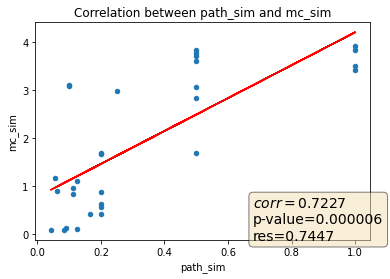

In [29]:
plot_scatter_with_regression(df, 'path_sim', 'mc_sim')

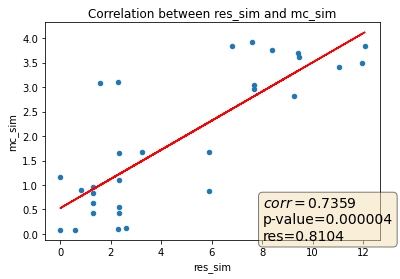

In [25]:
plot_scatter_with_regression(df, 'res_sim', 'mc_sim')

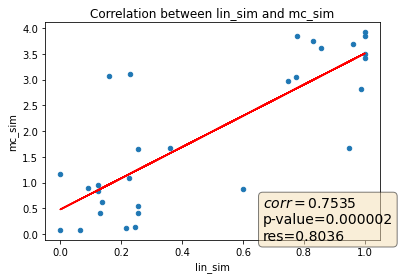

In [26]:
plot_scatter_with_regression(df, 'lin_sim', 'mc_sim')

Correlation is a way to test if two variables have any kind of relationship,
whereas p-value tells us if the result of an experiment is statistically significant.


In [ ]:
# TODO: Task 5.4